### Tasks:
### 1. Define problem statement and perform Exploratory Data Analysis 

a. Observations on shape of data and data types of all attributes

b. Check for missing value (if any)

c. Display the statistical summary

d. Univariate Analysis and Bivariate Analysis of all the attributes

Comments:
a. On range of attributes
b. Outliers of various attributes
c. On the distribution of the variables and relationship between them

### 2. Data Preprocessing 

a. Duplicate value check

b. Missing value treatment

c. Outlier treatment

d. Encoding categorical columns

e. Check for imbalance dataset and balancing it

f. Scaling

### 3. Model building 

a. Build the Logistic Regression model

b. Display model coefficients with column names

### 4. Results Evaluation 

a. Confusion Matrix and comments 

b. Classification Report and comments 

c. AU-ROC Curve & comments 

d. Precision Recall Curve & comments 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import TargetEncoder


In [2]:
df = pd.read_csv('loan.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


#  1. Define problem statement and perform Exploratory Data Analysis

 ###  a. Observations on shape of data and data types of all attributes

In [4]:
df.shape

(396030, 27)

In [5]:
df.dtypes

loan_amnt               float64
term                     object
int_rate                float64
installment             float64
grade                    object
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
title                    object
dti                     float64
earliest_cr_line         object
open_acc                float64
pub_rec                 float64
revol_bal               float64
revol_util              float64
total_acc               float64
initial_list_status      object
application_type         object
mort_acc                float64
pub_rec_bankruptcies    float64
address                  object
dtype: object

### b. Check for missing value (if any)

In [6]:
missing_values = df.isnull().sum()

### c. Display the statistical summary

In [7]:
df.describe()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,mort_acc,pub_rec_bankruptcies
count,396030.000000,396030.000000,396030.000000,3.960300e+05,396030.000000,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,358235.000000,395495.000000
mean,14113.888089,13.639400,431.849698,7.420318e+04,17.379514,11.311153,0.178191,1.584454e+04,53.791749,25.414744,1.813991,0.121648
std,8357.441341,4.472157,250.727790,6.163762e+04,18.019092,5.137649,0.530671,2.059184e+04,24.452193,11.886991,2.147930,0.356174
min,500.000000,5.320000,16.080000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000,0.000000
25%,8000.000000,10.490000,250.330000,4.500000e+04,11.280000,8.000000,0.000000,6.025000e+03,35.800000,17.000000,0.000000,0.000000
50%,12000.000000,13.330000,375.430000,6.400000e+04,16.910000,10.000000,0.000000,1.118100e+04,54.800000,24.000000,1.000000,0.000000
75%,20000.000000,16.490000,567.300000,9.000000e+04,22.980000,14.000000,0.000000,1.962000e+04,72.900000,32.000000,3.000000,0.000000
max,40000.000000,30.990000,1533.810000,8.706582e+06,9999.000000,90.000000,86.000000,1.743266e+06,892.300000,151.000000,34.000000,8.000000


# d. Univariate Analysis and Bivariate Analysis of all the attributes

## Univariate Analysis of  Numerical columns 


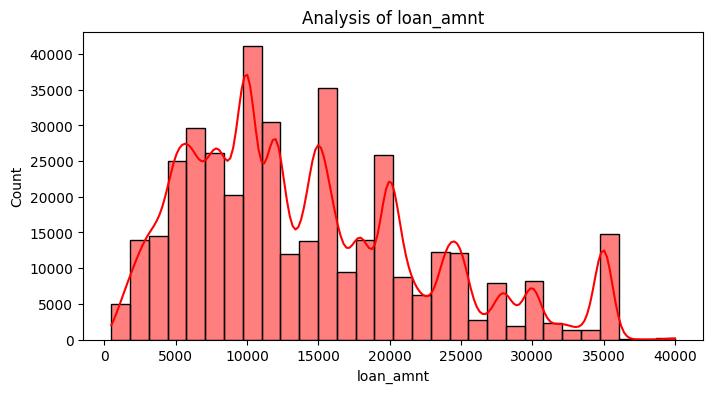

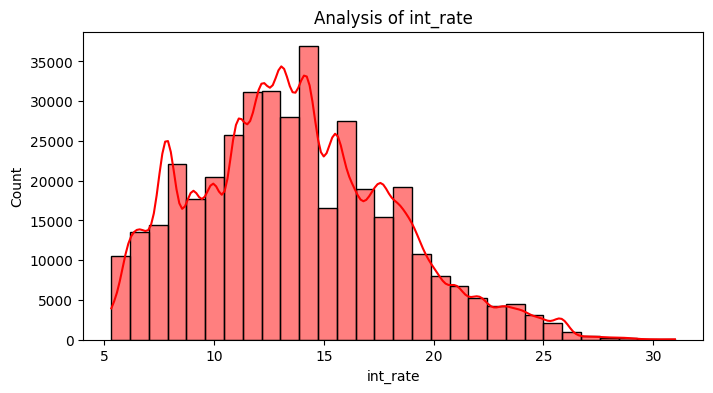

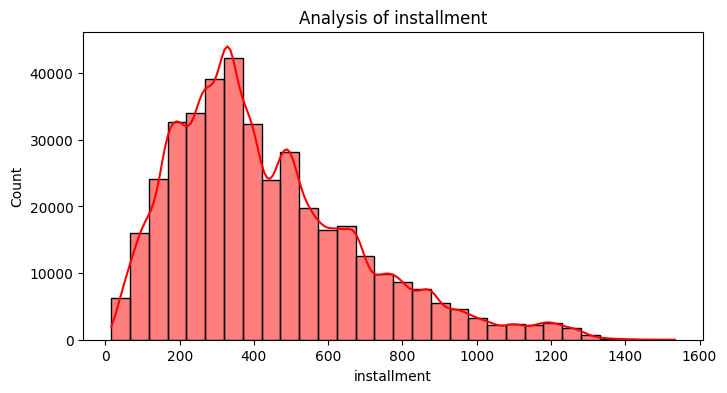

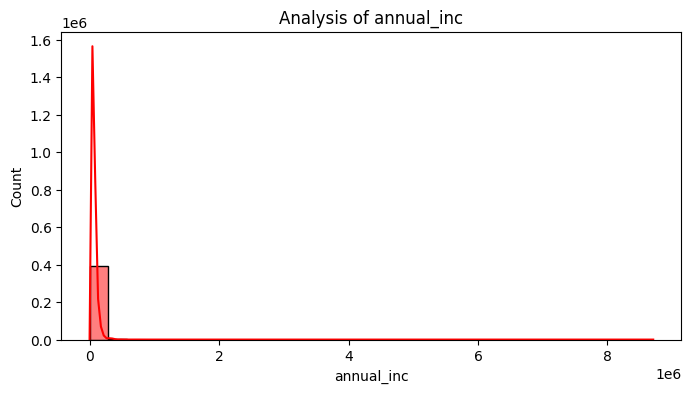

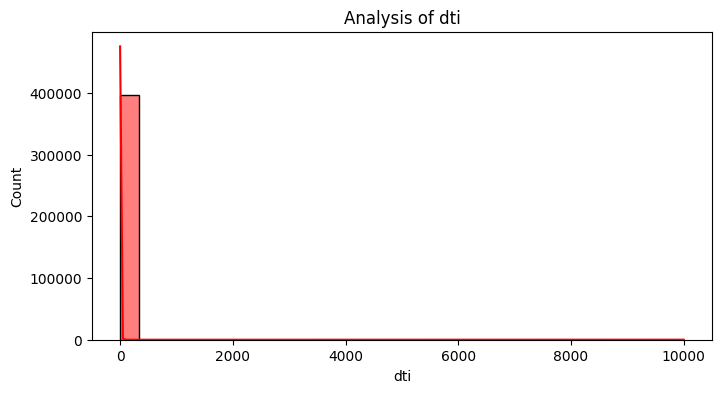

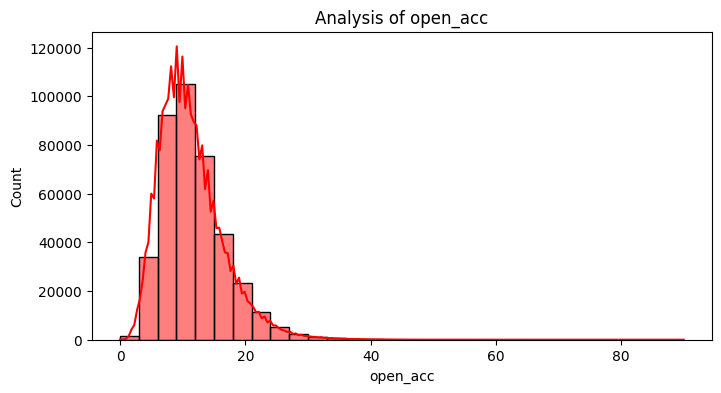

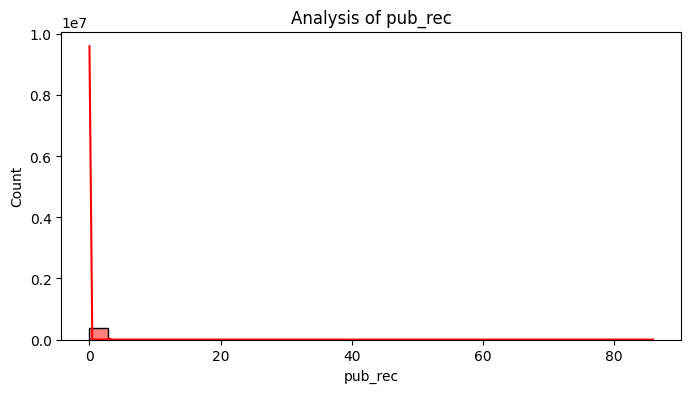

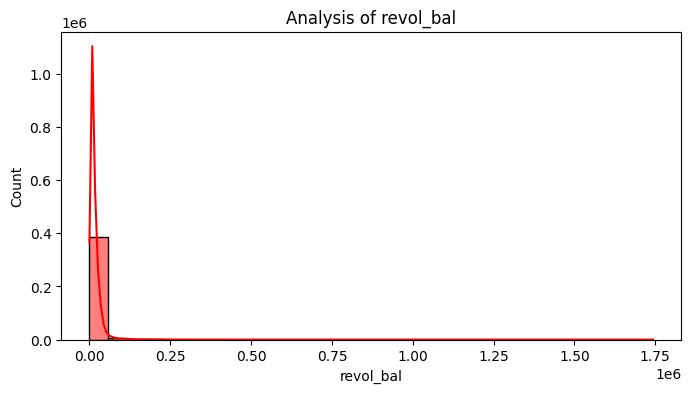

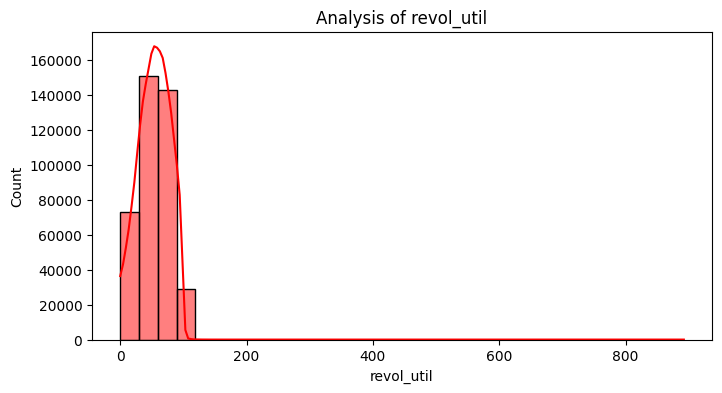

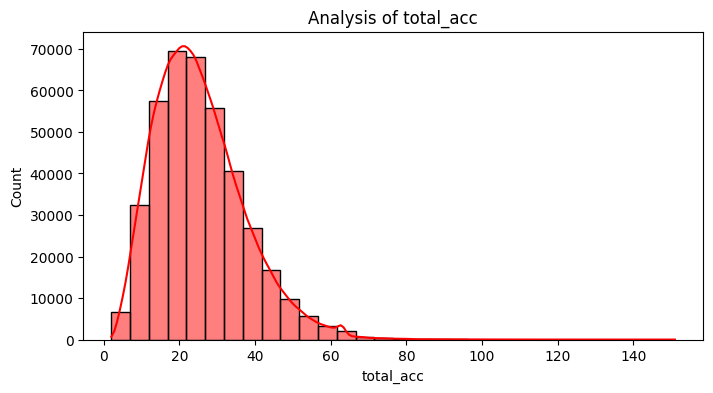

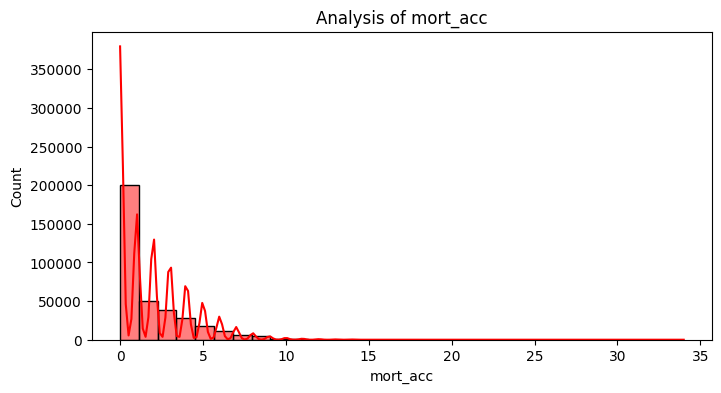

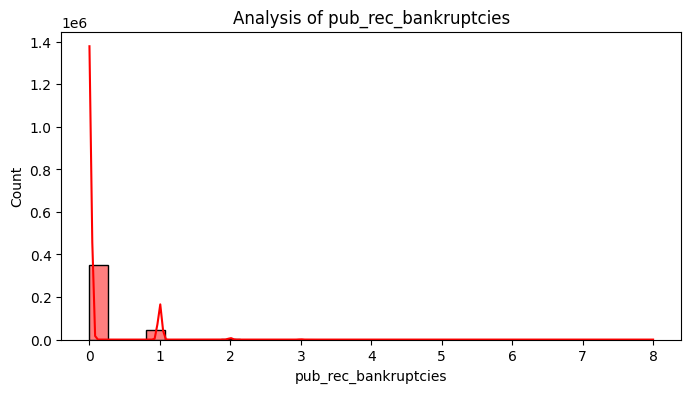

In [8]:
for numeric in df.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[numeric], kde=True, bins=30 ,color='red')
    plt.title(f"Analysis of {numeric}")
    plt.show()

## Univariate Analysis of  Categorical columns 


In [9]:
categorical_columns = ['home_ownership', 'verification_status', 'loan_status', 'application_type', 'grade', 'sub_grade', 'term']

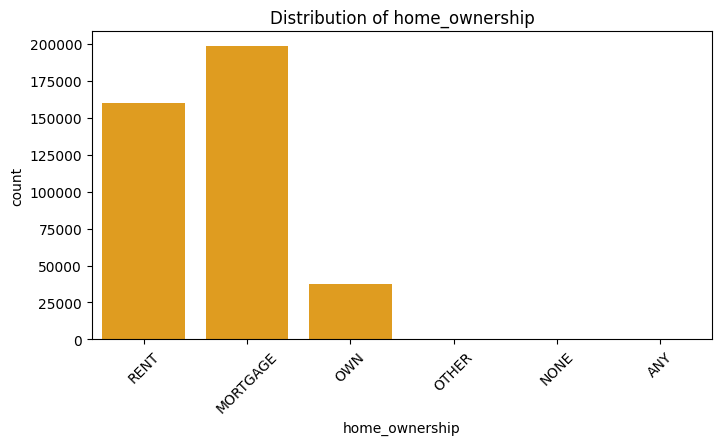

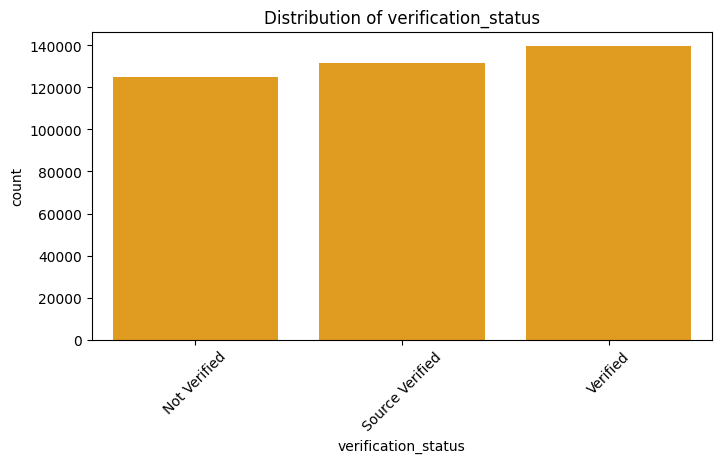

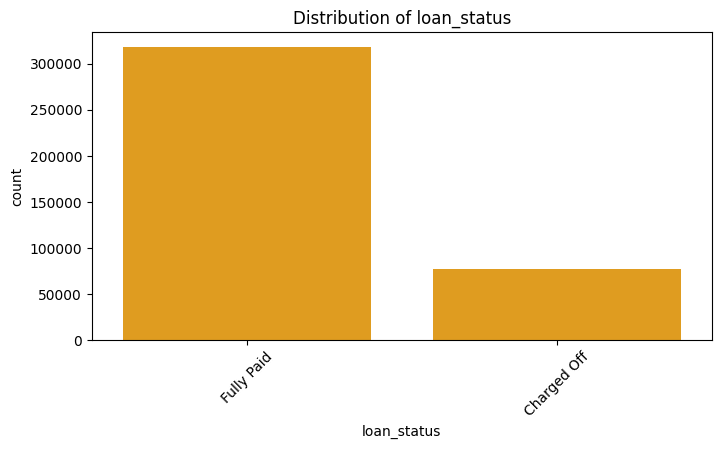

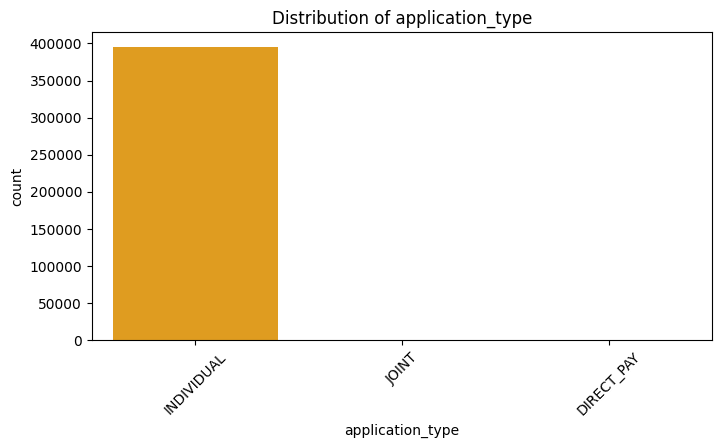

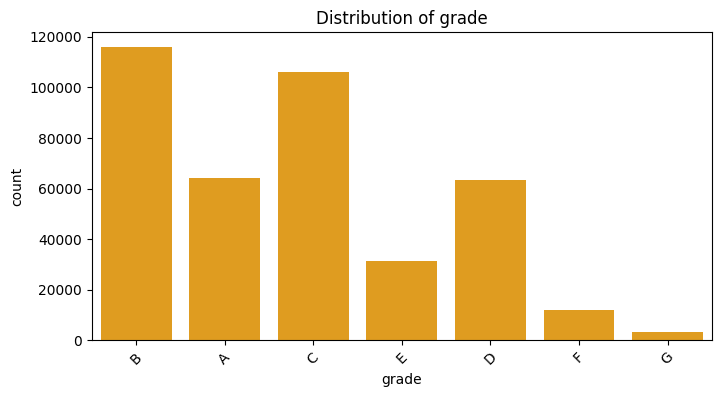

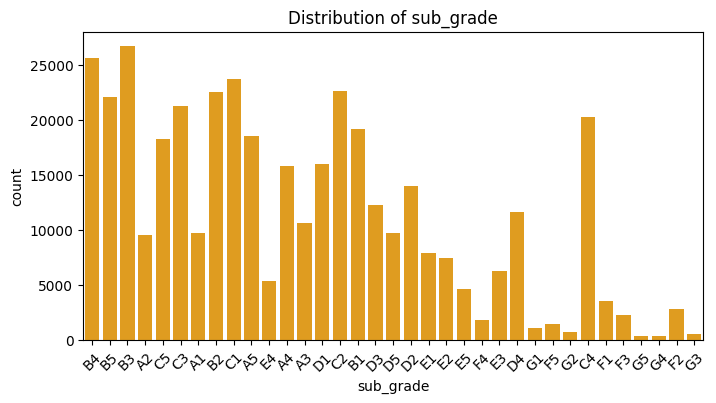

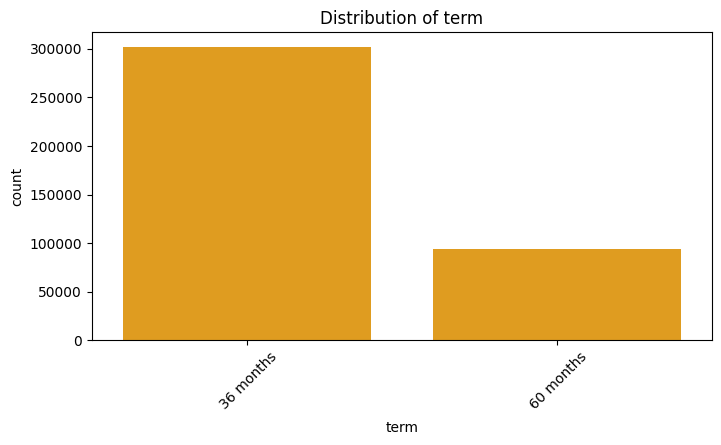

In [10]:
for i in categorical_columns :
    plt.figure(figsize=(8, 4))
    plt.title(f'Distribution of {i}')
    sns.countplot(data=df, x=i,color = 'orange')
    plt.xticks(rotation=45)
    plt.show()


## Bivariate Analysis 

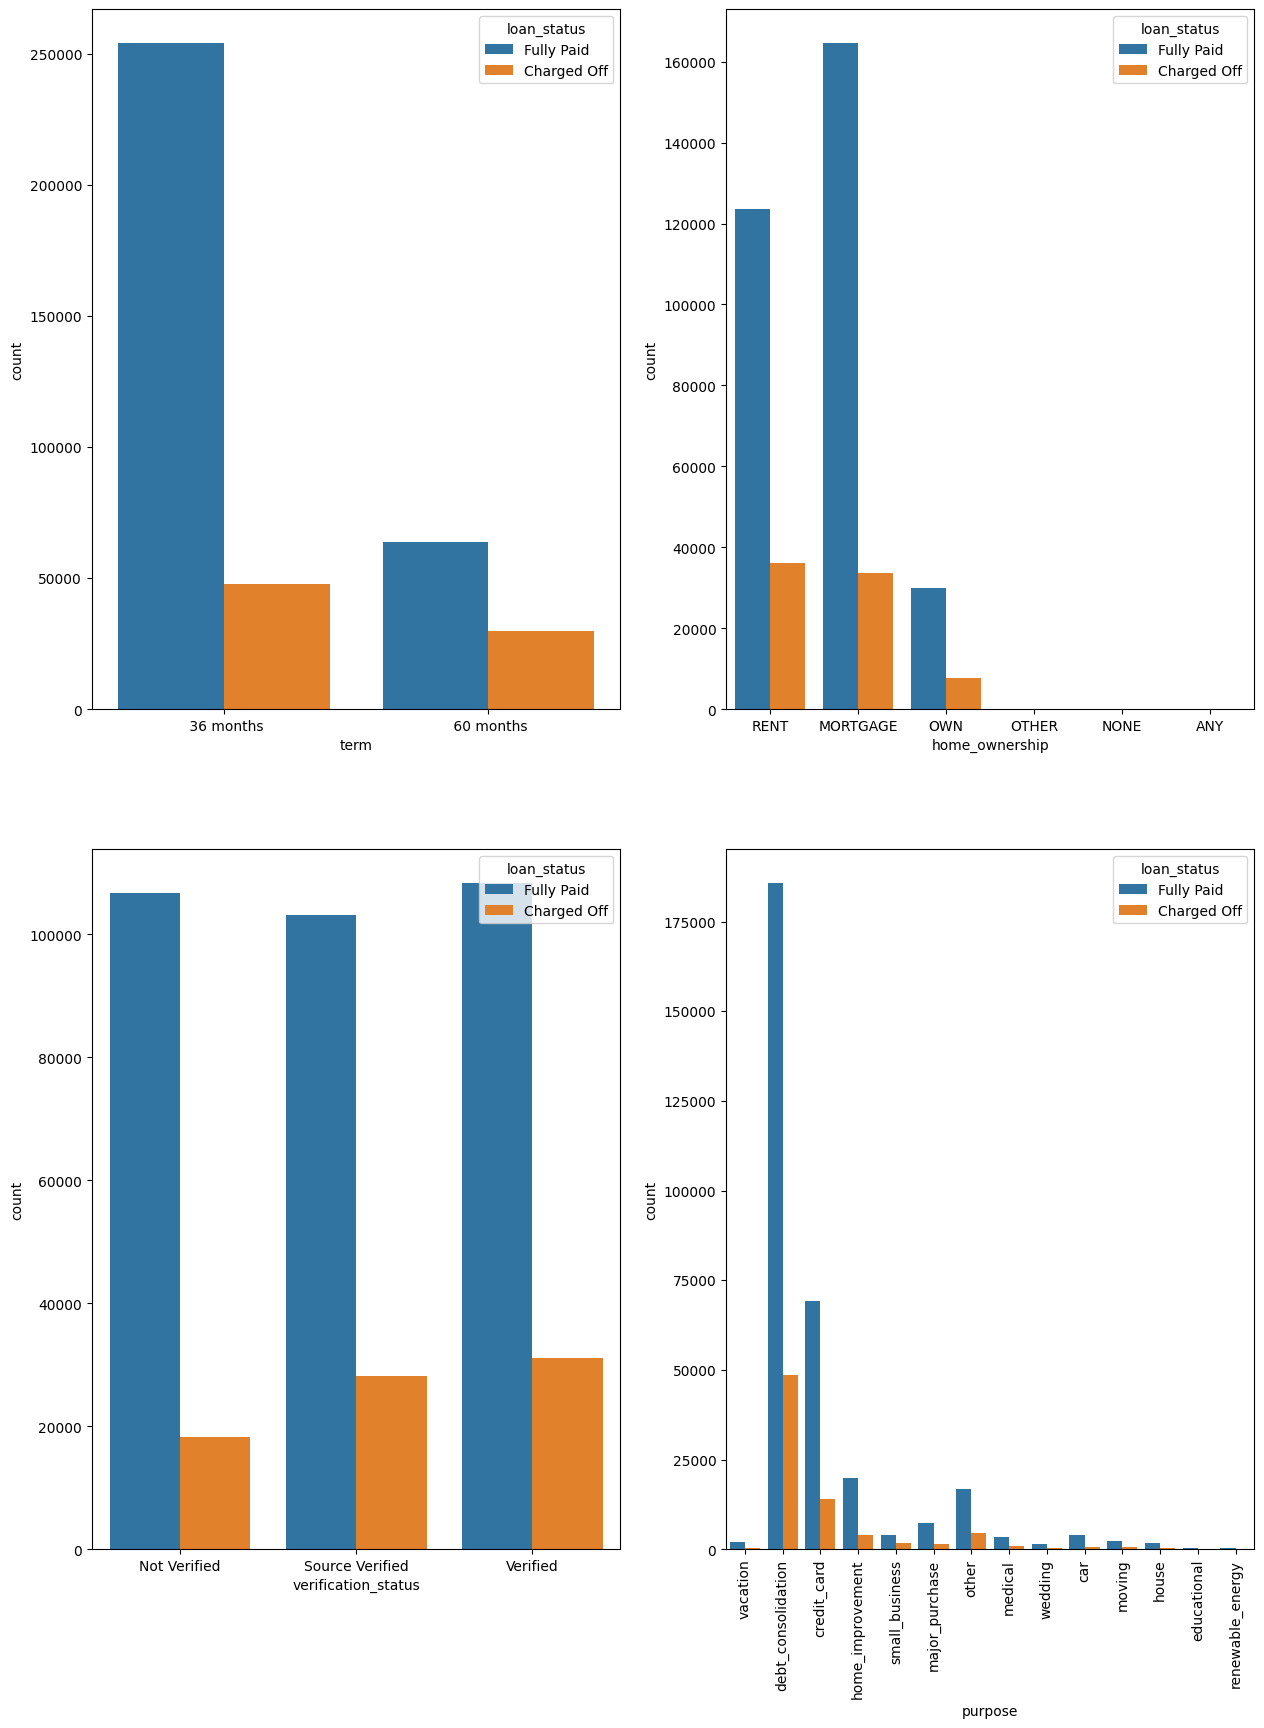

In [11]:
plt.figure(figsize=(15,20))

plt.subplot(2,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(2,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(2,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(2,2,4)
sns.countplot(x='purpose',data=df,hue='loan_status')
plt.xticks(rotation=90)

plt.show()

### Comments:
a. On range of attributes

b. Outliers of various attributes

c. On the distribution of the variables and relationship between them


In [12]:
# a. On range of attributes

In [13]:
columns = ['loan_amnt','installment','int_rate']
for i in columns:
    print(f'lower range {i} :{df[i].min()}')
    
    print(f'upper range {i} :{df[i].max()}')
    

lower range loan_amnt :500.0
upper range loan_amnt :40000.0
lower range installment :16.08
upper range installment :1533.81
lower range int_rate :5.32
upper range int_rate :30.99


In [14]:
#b. Outliers of various attributes

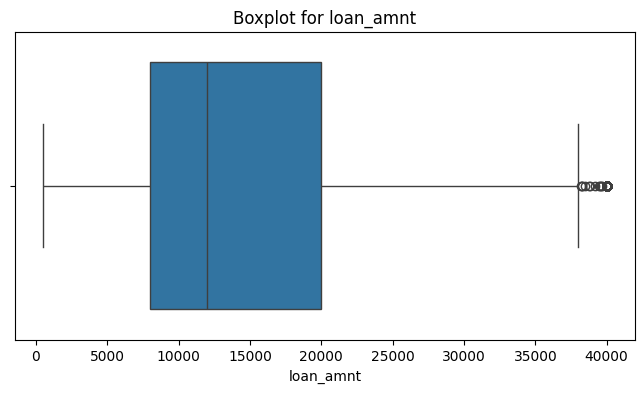

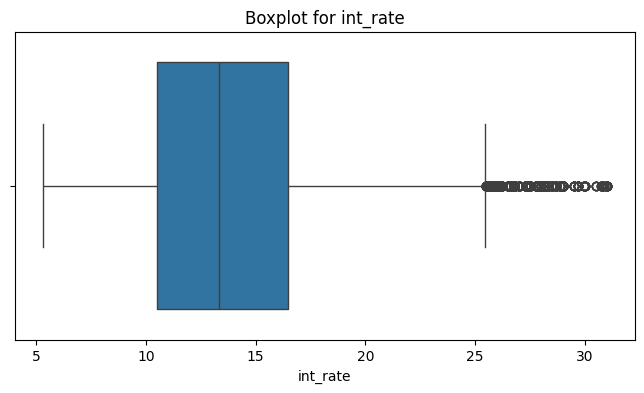

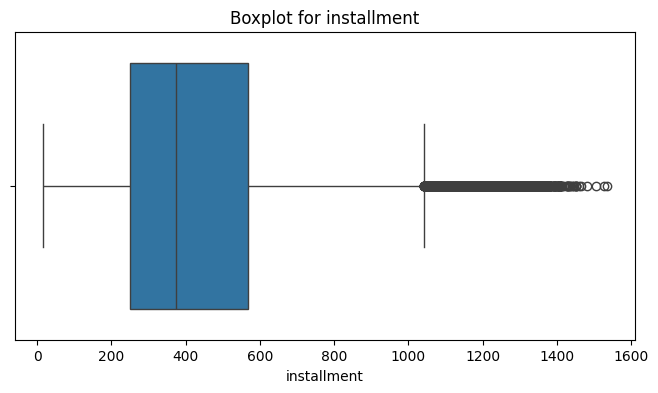

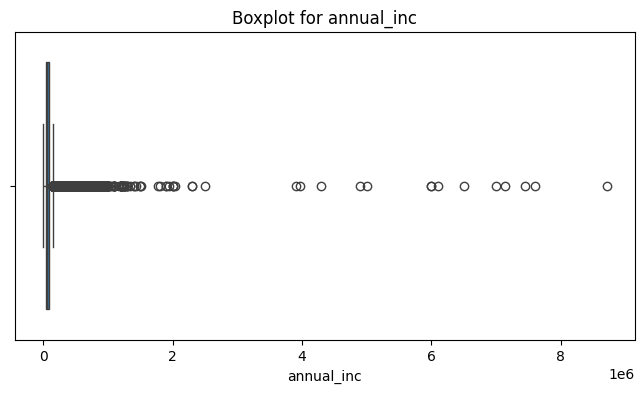

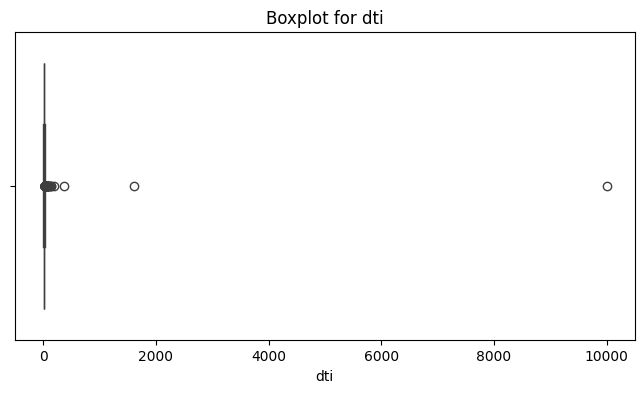

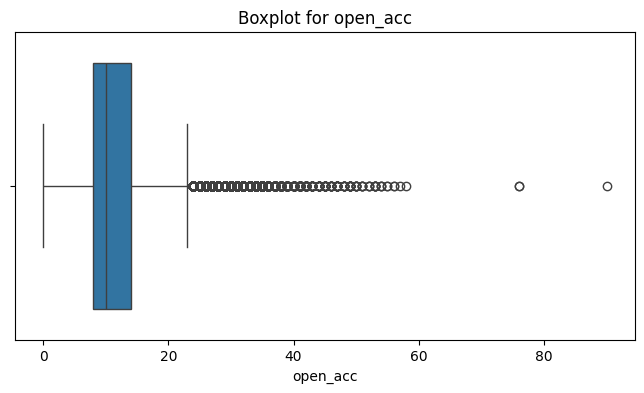

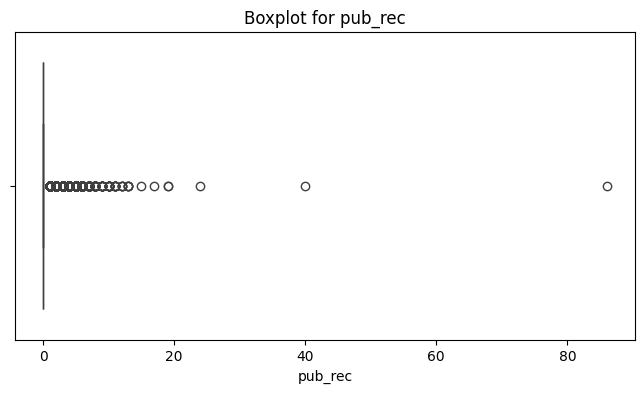

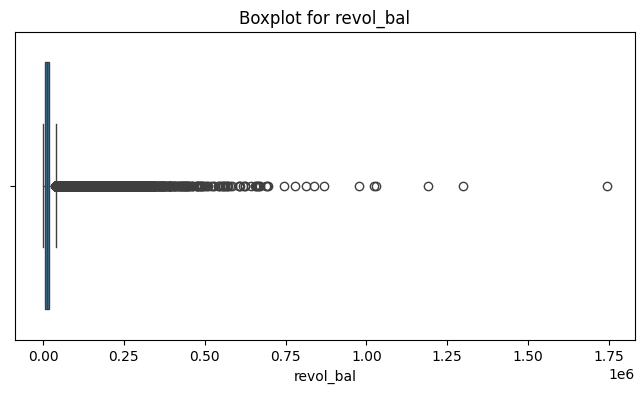

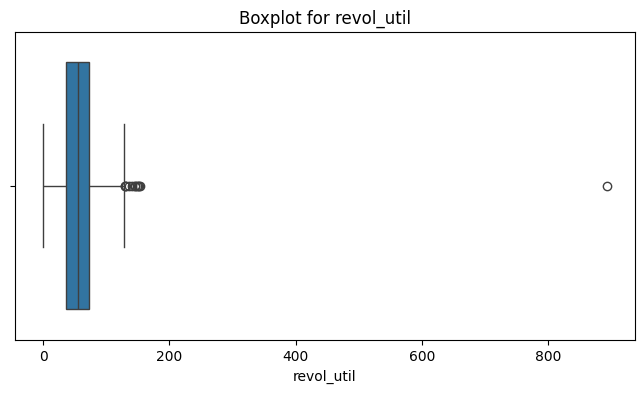

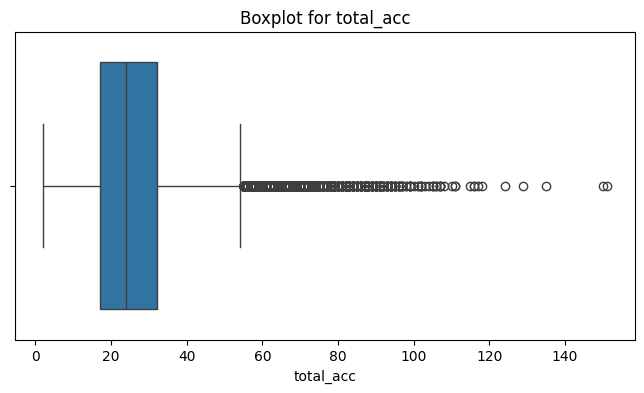

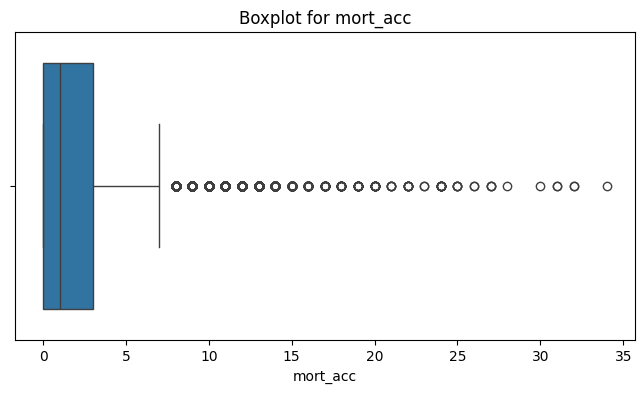

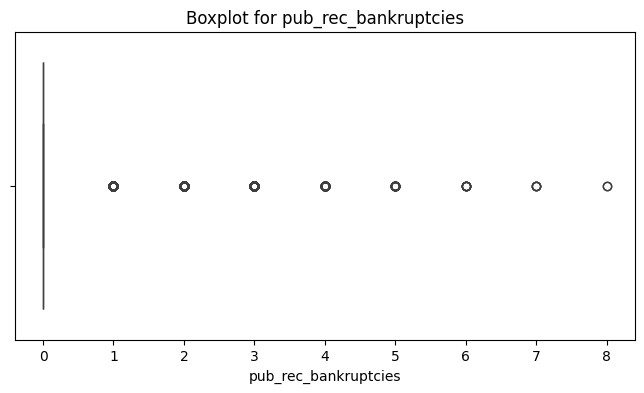

In [15]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

In [16]:
# c. On the distribution of the variables and relationship between them

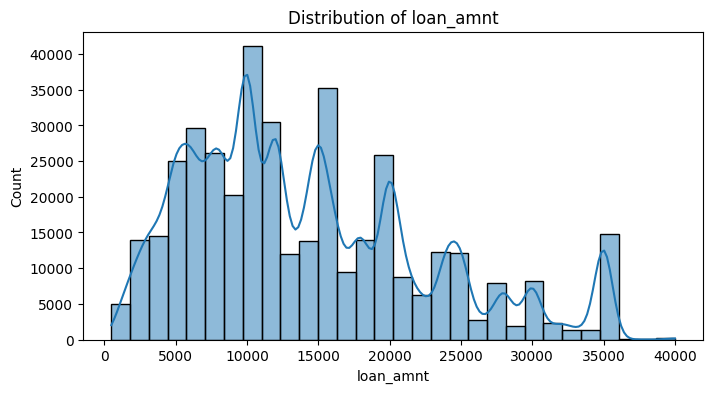

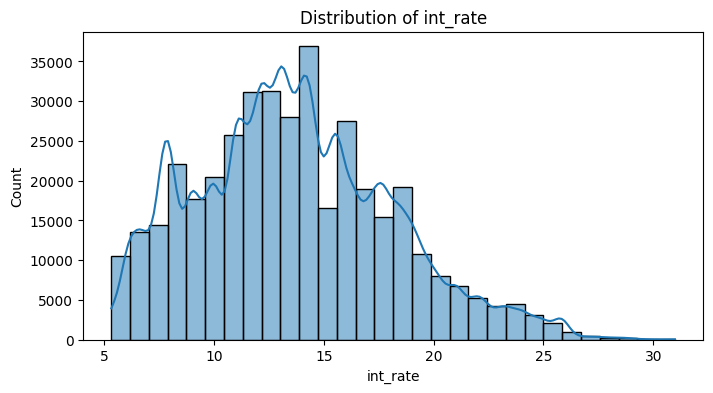

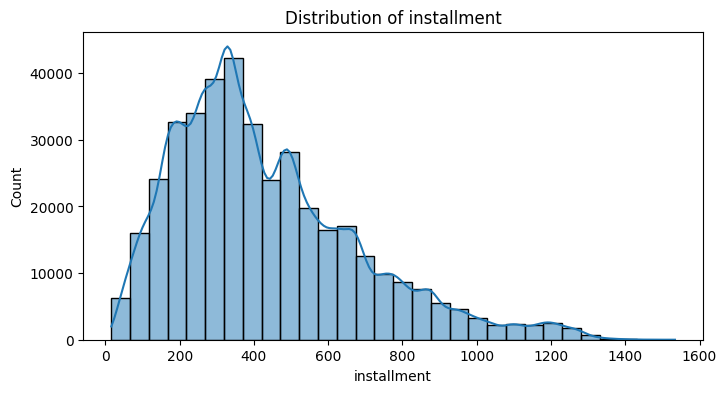

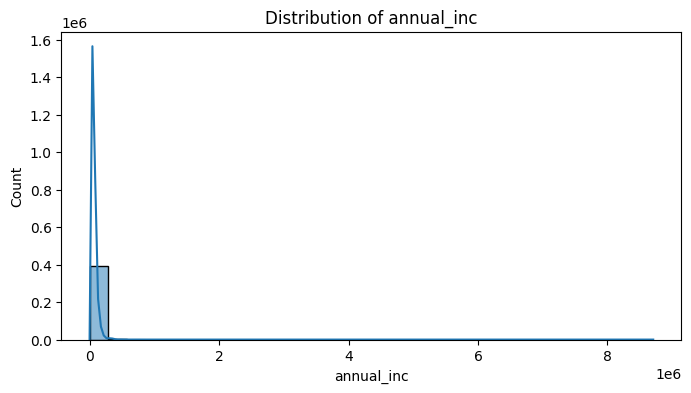

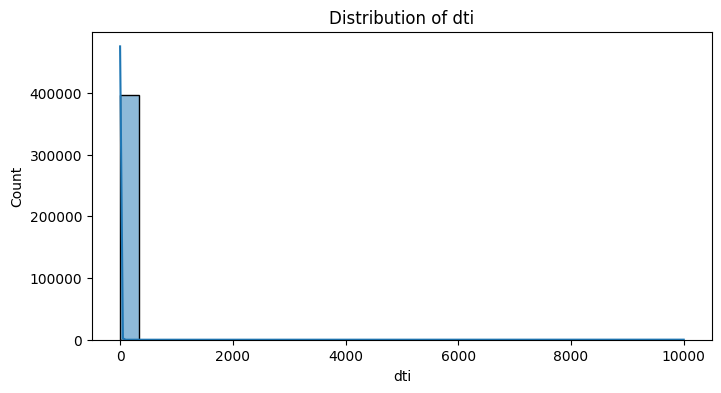

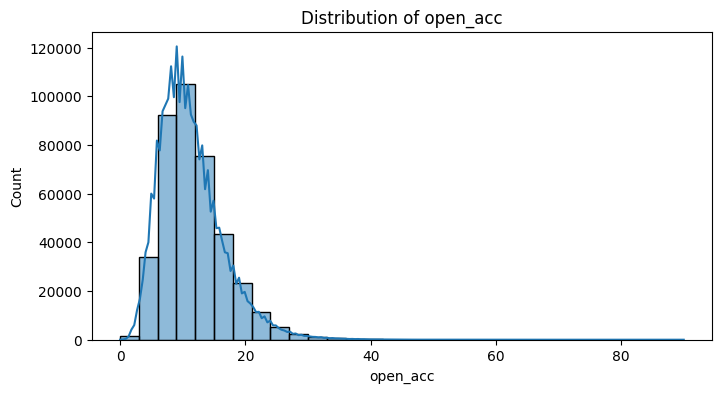

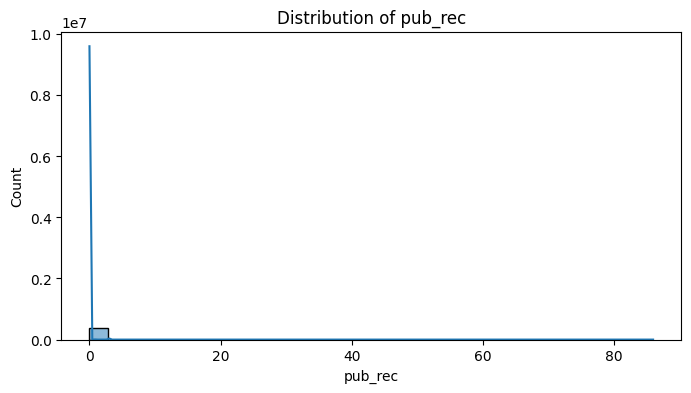

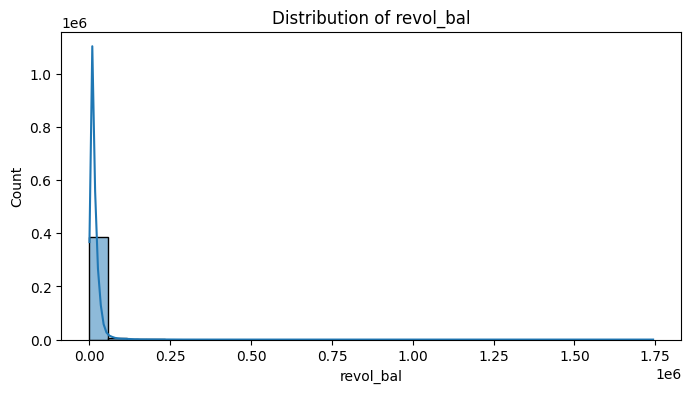

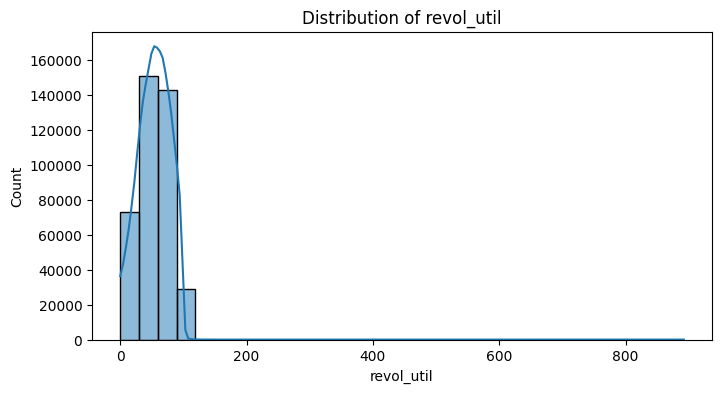

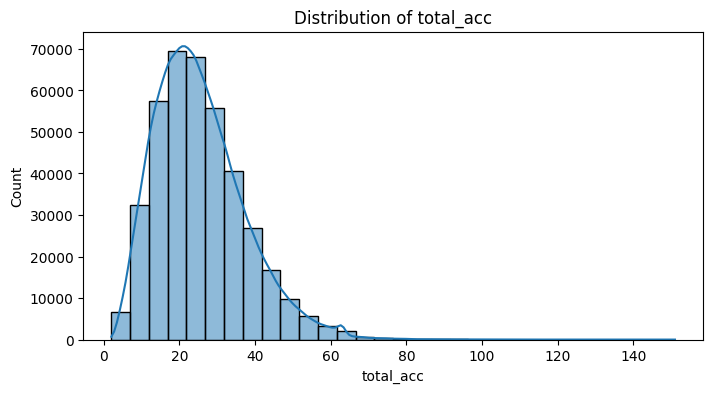

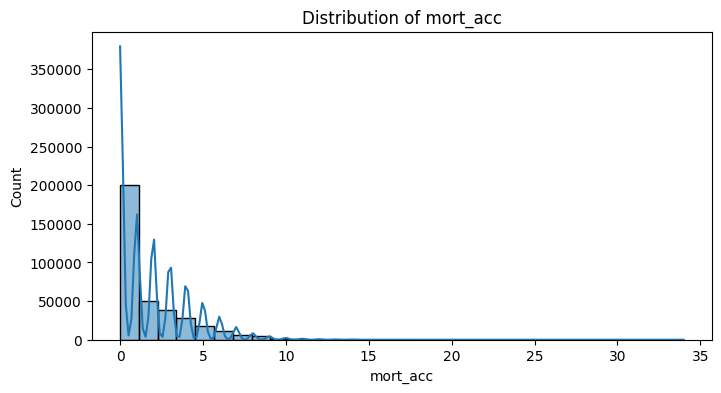

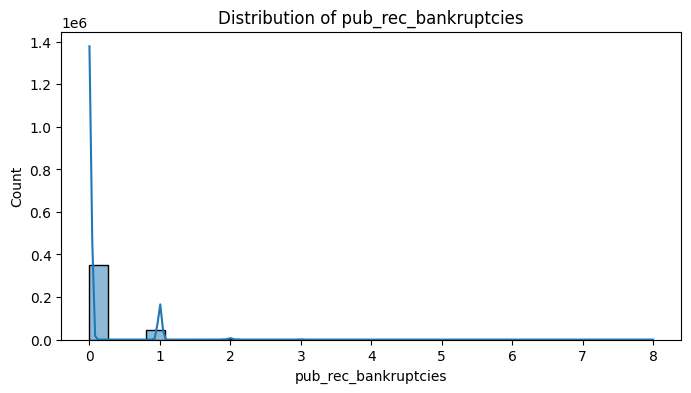

In [17]:
# Histogram for distribution of numerical columns
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
    plt.show()

### 2. Data Preprocessing 

### a. Duplicate value check   

In [18]:
df.duplicated().sum()

0

### b. Missing value treatment

In [19]:
missing_values

loan_amnt                   0
term                        0
int_rate                    0
installment                 0
grade                       0
sub_grade                   0
emp_title               22927
emp_length              18301
home_ownership              0
annual_inc                  0
verification_status         0
issue_d                     0
loan_status                 0
purpose                     0
title                    1756
dti                         0
earliest_cr_line            0
open_acc                    0
pub_rec                     0
revol_bal                   0
revol_util                276
total_acc                   0
initial_list_status         0
application_type            0
mort_acc                37795
pub_rec_bankruptcies      535
address                     0
dtype: int64

In [20]:
categorical = ['title','emp_length','emp_title']                        # Handle missing values for categorical columns
for i in categorical:
    df[i].fillna(value=df[i].mode()[0],inplace=True)


numeric = ['revol_util','mort_acc','pub_rec_bankruptcies']                 # Handle missing values for numerical columns
for i in numeric :
    df[i].fillna(value=df[i].mean(),inplace=True)

In [21]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

### c. Outlier treatment

In [22]:
# Capping outliers using IQR
for col in df.select_dtypes(include=['float', 'int']).columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR
    df[col] = np.clip(df[col], lower_whisker, upper_whisker)


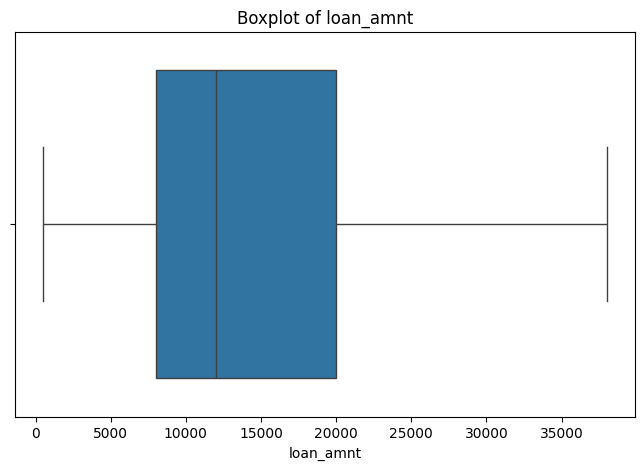

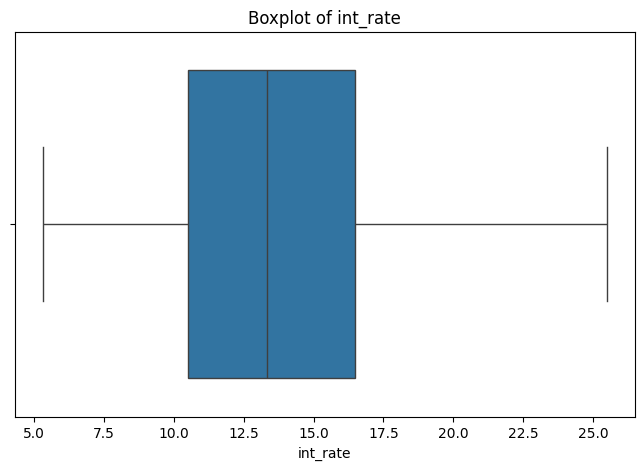

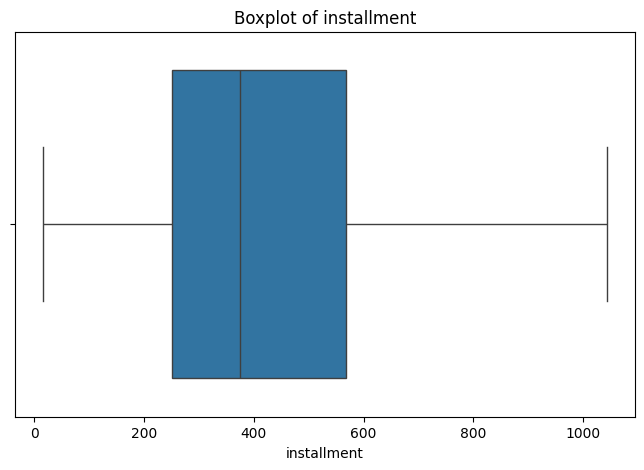

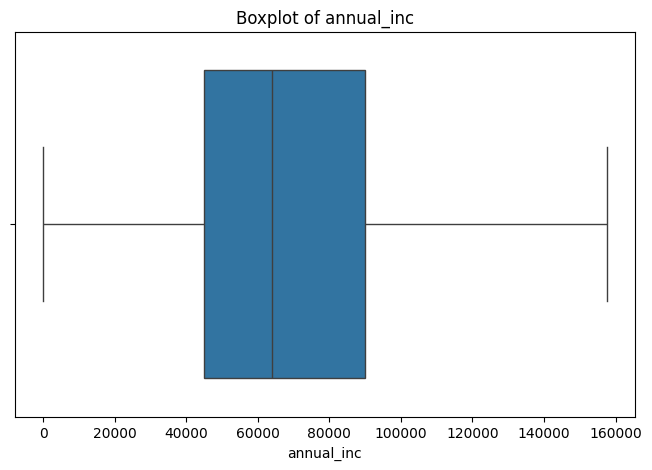

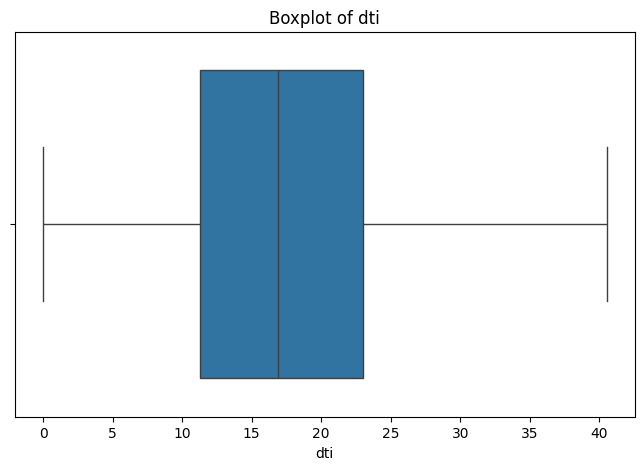

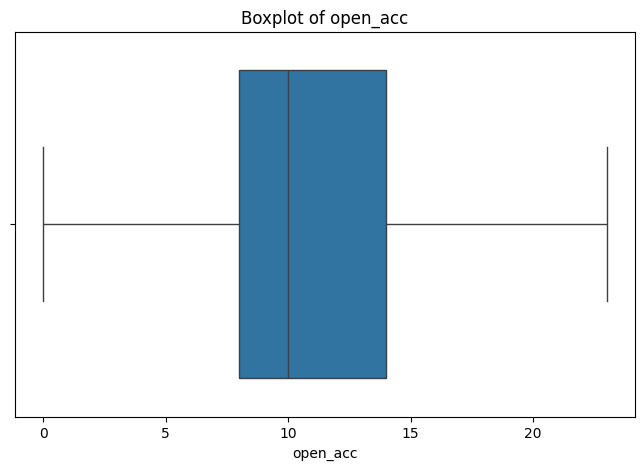

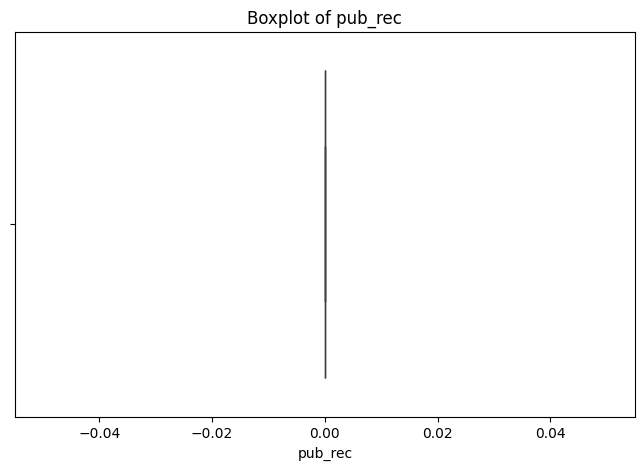

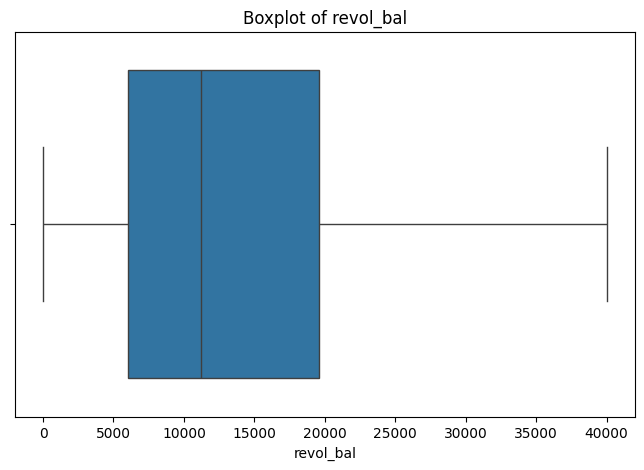

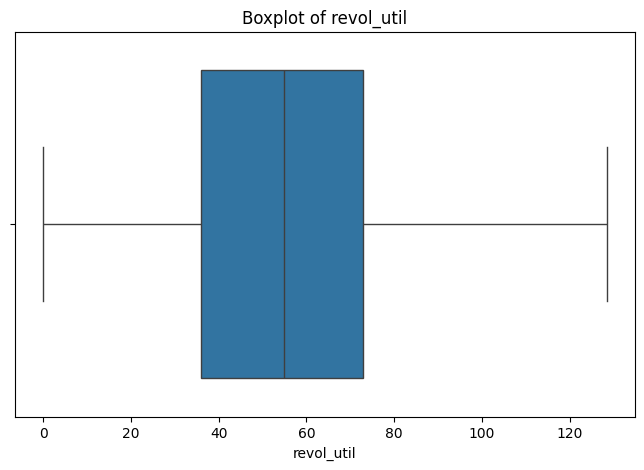

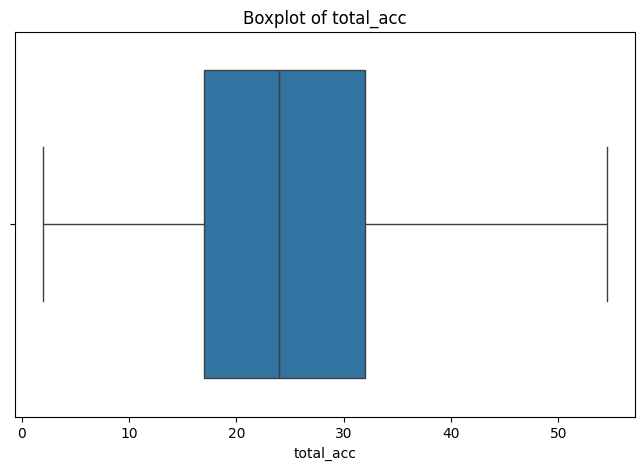

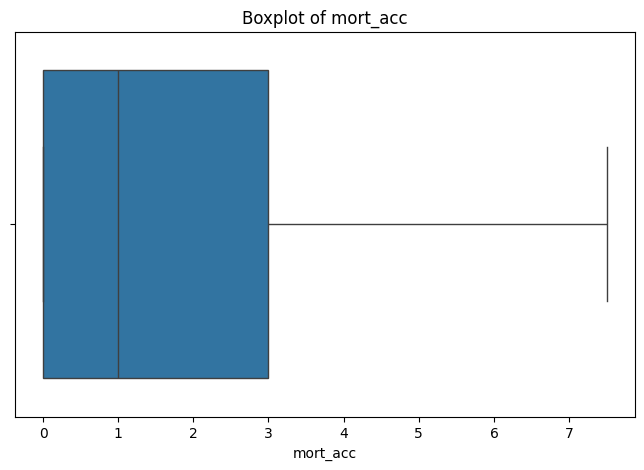

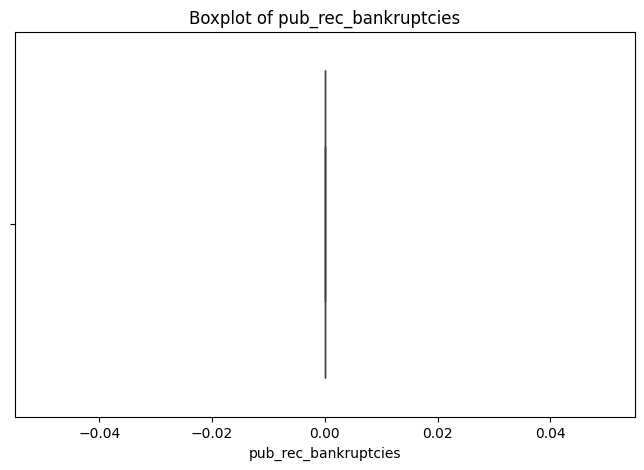

In [23]:
for i in df.select_dtypes(include=['float', 'int']).columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[i])
    plt.title(f"Boxplot of {i}")
    plt.show()


### d. Encoding categorical columns

In [24]:
df['loan_status'].value_counts().index.sort_values()
loan_status= {'Charged Off':1, 'Fully Paid':2}
df['loan_status'] = df['loan_status'].map(loan_status)
df['loan_status']

0         2
1         2
2         2
3         2
4         1
         ..
396025    2
396026    2
396027    2
396028    2
396029    2
Name: loan_status, Length: 396030, dtype: int64

In [25]:
 df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_title               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
title                   0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
dtype: int64

In [26]:
target_encoder = [
'emp_title', 'title', 'home_ownership', 'verification_status', 'purpose', 'initial_list_status', 'application_type', 'grade'
]

In [27]:
for i in target_encoder:
    from category_encoders import TargetEncoder
    Encoder = TargetEncoder()
    df[i] = Encoder.fit_transform(df[i],df["loan_status"])

In [28]:
df.select_dtypes(include='object')

,term,sub_grade,emp_length,issue_d,earliest_cr_line,address
0,36 months,B4,10+ years,Jan-2015,Jun-1990,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,36 months,B5,4 years,Jan-2015,Jul-2004,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,36 months,B3,< 1 year,Jan-2015,Aug-2007,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,36 months,A2,6 years,Nov-2014,Sep-2006,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,60 months,C5,9 years,Apr-2013,Mar-1999,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...
396025,60 months,B4,2 years,Oct-2015,Nov-2004,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,36 months,C1,5 years,Feb-2015,Feb-2006,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,36 months,B1,10+ years,Oct-2013,Mar-1997,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,60 months,C2,10+ years,Aug-2012,Nov-1990,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  object 
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  object 
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [30]:
import re
def encode(df, columns):
    df[columns] = df[columns].applymap(lambda x: re.sub(r"[^\d\s]", "", x))
    df[columns] = df[columns].astype(int)
    return df[columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  object 
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  object 
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [32]:
columns_to_encode = ['term', 'sub_grade', 'emp_length', 'issue_d', 'earliest_cr_line']

In [33]:
encode(df, columns_to_encode)

,term,sub_grade,emp_length,issue_d,earliest_cr_line
0,36,4,10,2015,1990
1,36,5,4,2015,2004
2,36,3,1,2015,2007
3,36,2,6,2014,2006
4,60,5,9,2013,1999
...,...,...,...,...,...
396025,60,4,2,2015,2004
396026,36,1,5,2015,2006
396027,36,1,10,2013,1997
396028,60,2,10,2012,1990


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  int32  
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  int32  
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  int32  
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [35]:
import re
def encode(data,column):
 df[column]=df[column].apply(lambda x: re.search(r'\b\d{5}\b',x).group() if re.search(r'\b\d{5}\b',x) else "")
 df[column] = df[column].astype(int)
 return df[column]

In [36]:
encode(df, 'address')

0         22690
1          5113
2         87025
3           813
4         11650
          ...  
396025    12951
396026     5113
396027    70466
396028    29597
396029    48052
Name: address, Length: 396030, dtype: int32

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  int32  
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  float64
 5   sub_grade             396030 non-null  int32  
 6   emp_title             396030 non-null  float64
 7   emp_length            396030 non-null  int32  
 8   home_ownership        396030 non-null  float64
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  float64
 11  issue_d               396030 non-null  int32  
 12  loan_status           396030 non-null  int64  
 13  purpose               396030 non-null  float64
 14  title                 396030 non-null  float64
 15  

In [38]:
cat = df.select_dtypes(include=['float64', 'int64']).columns


In [39]:
df[cat].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 21 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   int_rate              396030 non-null  float64
 2   installment           396030 non-null  float64
 3   grade                 396030 non-null  float64
 4   emp_title             396030 non-null  float64
 5   home_ownership        396030 non-null  float64
 6   annual_inc            396030 non-null  float64
 7   verification_status   396030 non-null  float64
 8   loan_status           396030 non-null  int64  
 9   purpose               396030 non-null  float64
 10  title                 396030 non-null  float64
 11  dti                   396030 non-null  float64
 12  open_acc              396030 non-null  float64
 13  pub_rec               396030 non-null  float64
 14  revol_bal             396030 non-null  float64
 15  

### e. Check for imbalance dataset and balancing it

In [40]:
target = df['loan_status']
target

0         2
1         2
2         2
3         2
4         1
         ..
396025    2
396026    2
396027    2
396028    2
396029    2
Name: loan_status, Length: 396030, dtype: int64

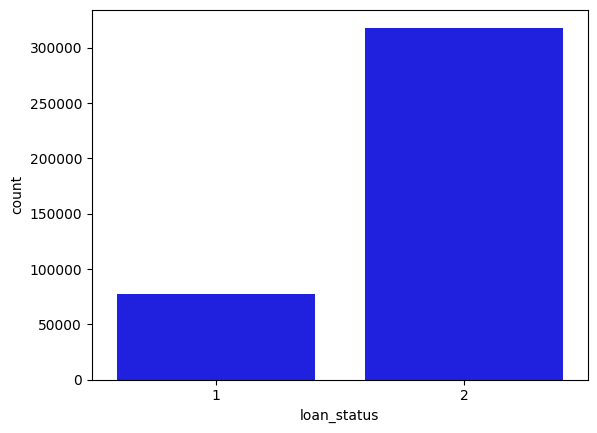

In [41]:
sns.countplot(x=target, color='blue')
plt.show()

In [42]:
target.value_counts()

loan_status
2    318357
1     77673
Name: count, dtype: int64

In [43]:
from imblearn.over_sampling import SMOTE

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
X = df.drop('loan_status', axis=1)
X

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36,11.44,329.48,1.874270,4,1.752860,10,1.773378,117000.0,...,16.0,0.0,36369.0,41.8,25.0,1.799245,1.803913,0.000000,0.0,22690
1,8000.0,36,11.99,265.68,1.874270,5,1.782678,4,1.830439,65000.0,...,17.0,0.0,20131.0,53.3,27.0,1.806940,1.803913,3.000000,0.0,5113
2,15600.0,36,10.49,506.97,1.874270,3,1.808007,1,1.773378,43057.0,...,13.0,0.0,11987.0,92.2,26.0,1.806940,1.803913,0.000000,0.0,87025
3,7200.0,36,6.49,220.65,1.937121,2,1.829389,6,1.773378,54000.0,...,6.0,0.0,5472.0,21.5,13.0,1.806940,1.803913,0.000000,0.0,813
4,24375.0,60,17.27,609.33,1.788191,5,1.699281,9,1.830439,55000.0,...,13.0,0.0,24584.0,69.8,43.0,1.806940,1.803913,1.000000,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,1.874270,4,1.829389,2,1.773378,40000.0,...,6.0,0.0,1990.0,34.3,23.0,1.799245,1.803913,0.000000,0.0,12951
396026,21000.0,36,12.29,700.42,1.788191,1,1.779570,5,1.830439,110000.0,...,6.0,0.0,40012.5,95.7,8.0,1.806940,1.803913,1.000000,0.0,5113
396027,5000.0,36,9.99,161.32,1.874270,1,1.731997,10,1.773378,56500.0,...,15.0,0.0,32704.0,66.9,23.0,1.806940,1.803913,0.000000,0.0,70466
396028,21000.0,60,15.31,503.02,1.788191,2,1.829389,10,1.830439,64000.0,...,9.0,0.0,15704.0,53.8,20.0,1.806940,1.803913,5.000000,0.0,29597


In [46]:
y = target
y

0         2
1         2
2         2
3         2
4         1
         ..
396025    2
396026    2
396027    2
396028    2
396029    2
Name: loan_status, Length: 396030, dtype: int64

In [47]:
X_train_A, X_test, y_train_A, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train, X_val, y_train, y_val = train_test_split(X_train_A, y_train_A, test_size=0.2, random_state=0)

In [48]:
X_train.shape, y_train.shape

((253459, 26), (253459,))

In [49]:
X_val.shape, y_val.shape

((63365, 26), (63365,))

In [50]:
X_test.shape, y_test.shape

((79206, 26), (79206,))

In [51]:
print('Before SMOTE:')
print(y_train.value_counts())

Before SMOTE:
loan_status
2    203631
1     49828
Name: count, dtype: int64


In [52]:
smt = SMOTE()

In [53]:
X_sm, y_sm = smt.fit_resample(X_train, y_train)

In [54]:
print('After Oversampling:')
print(y_sm.value_counts())

After Oversampling:
loan_status
2    203631
1    203631
Name: count, dtype: int64


### f Scaling

In [55]:
from sklearn.preprocessing import StandardScaler

In [56]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_train_scaled

array([[ 0.70687116, -0.55768937, -0.28829316, ...,  0.11381631,
         0.        , -0.33219695],
       [ 1.30540709, -0.55768937,  1.76500191, ..., -0.93099421,
         0.        ,  1.99015634],
       [-0.69071024, -0.55768937,  0.15651255, ..., -0.93099421,
         0.        ,  0.71752282],
       ...,
       [-0.58895913, -0.55768937,  0.19245645, ..., -0.93099421,
         0.        , -0.03001533],
       [ 2.14335739,  1.7931129 ,  1.18765307, ..., -0.40858895,
         0.        , -0.98166464],
       [-0.92114657, -0.55768937, -0.87238148, ...,  0.63622157,
         0.        ,  0.17590727]])

In [57]:
X_test_scaled = scaler.fit_transform(X_test)
X_test_scaled

array([[-1.33492235, -0.55830555,  1.69945301, ..., -0.93116863,
         0.        ,  1.07186616],
       [-0.49417446, -0.55830555,  0.37791462, ..., -0.93116863,
         0.        ,  1.15161136],
       [ 1.30742816, -0.55830555, -0.59466559, ...,  0.63362733,
         0.        ,  0.88764099],
       ...,
       [-0.00173641, -0.55830555,  0.40042805, ..., -0.40956998,
         0.        , -0.57859143],
       [-0.68634541, -0.55830555,  0.30587164, ..., -0.93116863,
         0.        , -1.16041992],
       [-1.27486893, -0.55830555,  0.48823043, ..., -0.40956998,
         0.        , -1.37086467]])

In [58]:
X_val_scaled = scaler.transform(X_val)

In [59]:
X_val_scaled

array([[ 0.10335707,  1.7911339 ,  1.20640887, ..., -0.93116863,
         0.        , -0.32845516],
       [-0.49417446, -0.55830555,  1.20640887, ..., -0.93116863,
         0.        , -1.37086467],
       [-0.08881387, -0.55830555, -0.14439697, ..., -0.93116863,
         0.        , -0.28767719],
       ...,
       [-0.83047362, -0.55830555, -1.00441002, ..., -0.40956998,
         0.        , -0.32845516],
       [-1.09470867, -0.55830555, -0.16916174, ..., -0.40956998,
         0.        , -0.84817511],
       [ 0.58678711,  1.7911339 ,  1.43154318, ...,  0.11202868,
         0.        , -0.28767719]])

### 3. Model building

In [60]:
from sklearn.linear_model import LogisticRegression  
model= LogisticRegression()  
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [61]:
y_train_predictions = model.predict(X_train_scaled)
y_val_predictions = model.predict(X_val_scaled)
y_test_predictions = model.predict(X_test_scaled)

In [62]:
print("Training Accuracy:",model.score(X_train_scaled, y_train))
print("Validation Accuracy:",model.score(X_val_scaled, y_val))
print("Test Accuracy:",model.score(X_test_scaled, y_test))

Training Accuracy: 0.8710521228285443
Validation Accuracy: 0.8710644677661169
Test Accuracy: 0.8725727848900335


In [63]:
def Accuracy(y1, y2):
    acc = np.sum(y1==y2)/len(y2)
    return acc

In [64]:
train_scores=Accuracy(y_train, y_train_predictions)
train_scores

0.8710521228285443

In [65]:
val_scores = Accuracy(y_val, y_val_predictions)
val_scores

0.8710644677661169

In [66]:
test_scores = Accuracy(y_test, y_test_predictions)
test_scores

0.8725727848900335

In [67]:
model_lr=LogisticRegression(C=1/60)
model_lr.fit(X_train_scaled, y_train)

LogisticRegression(C=0.016666666666666666)

In [68]:
Accuracy(y_train, model_lr.predict(X_train_scaled))

0.8710757952962807

In [69]:
Accuracy(y_val, model_lr.predict(X_val_scaled))

0.8710013414345459

In [70]:
Accuracy(y_test, model_lr.predict(X_test_scaled))

0.8724717824407242

In [71]:
y_pred = model_lr.predict(X_test_scaled)

In [72]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [73]:

conf_mat = confusion_matrix(y_test,  model_lr.predict(X_test_scaled))
conf_mat

array([[ 8284,  7111],
       [ 2990, 60821]], dtype=int64)

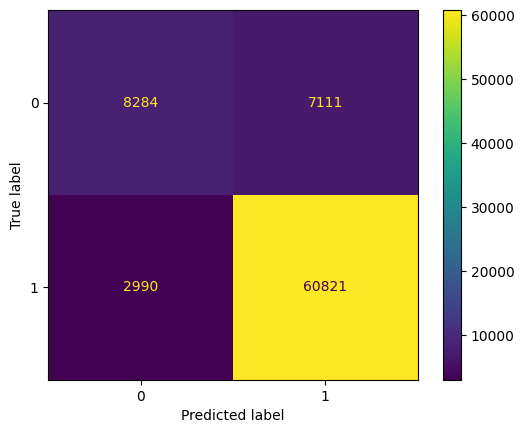

In [74]:

ConfusionMatrixDisplay(conf_mat).plot()
plt.show()

In [75]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [76]:
precision_score(y_test, model.predict(X_test_scaled))

0.7347264034000354

In [77]:
recall_score(y_test, model.predict(X_test_scaled))

0.5390061708346866

In [78]:
f1_score(y_test, model.predict(X_test_scaled))

0.6218292180299

In [79]:
from sklearn.metrics import classification_report
report = classification_report(y_test, model.predict(X_test_scaled))
print(report)

              precision    recall  f1-score   support

           1       0.73      0.54      0.62     15395
           2       0.90      0.95      0.92     63811

    accuracy                           0.87     79206
   macro avg       0.82      0.75      0.77     79206
weighted avg       0.86      0.87      0.86     79206



### AU-ROC Curve

In [80]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [81]:
prob = model_lr.predict_proba(X_test_scaled)
prob

array([[0.76020035, 0.23979965],
       [0.21729358, 0.78270642],
       [0.23577949, 0.76422051],
       ...,
       [0.04667592, 0.95332408],
       [0.36792501, 0.63207499],
       [0.02150655, 0.97849345]])

In [82]:
probabilities = prob[:, 1]
probabilities

array([0.23979965, 0.78270642, 0.76422051, ..., 0.95332408, 0.63207499,
       0.97849345])

In [83]:
fpr, tpr, thr = roc_curve(y_test, probabilities, pos_label=2)

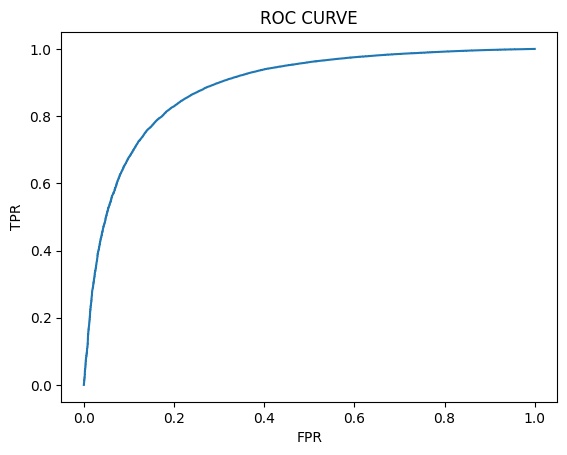

In [84]:
plt.plot(fpr,tpr)
plt.title('ROC CURVE')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

In [85]:
roc_auc_score(y_test, probabilities)

0.889005460562839

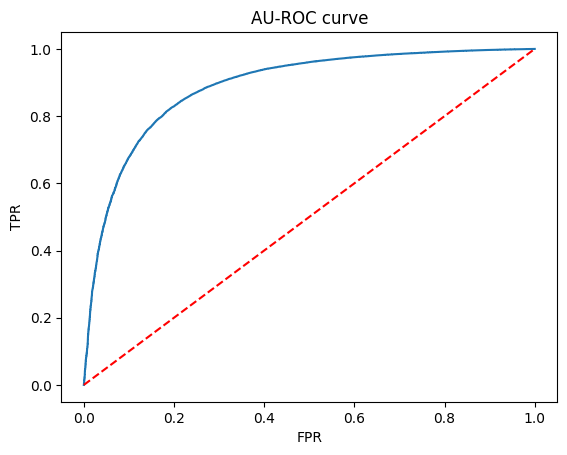

In [86]:
plt.plot(fpr, tpr)
plt.plot(fpr, fpr,'--', color='red')
plt.title('AU-ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

###  Precision Recall Curve

In [87]:
from sklearn.metrics import precision_recall_curve

In [88]:
precision, recall, thr = precision_recall_curve(y_test, probabilities, pos_label=2)

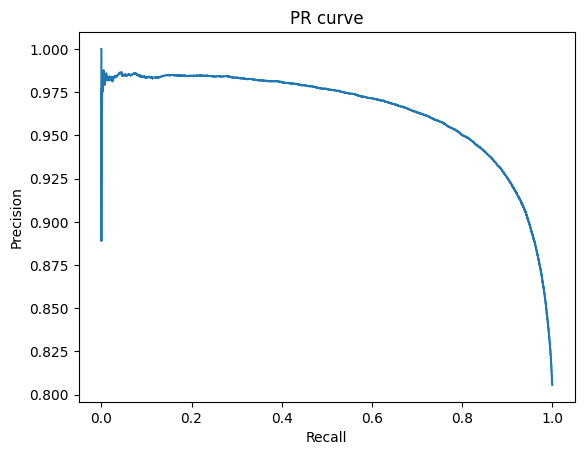

In [89]:
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('PR curve')
plt.show()

### Summary

#### 1.Logistic Regression model was built, and the accuracy achieved was 0.8710757952962807 of training data.

#### 2.The dataset had 27 columns, including features like loan amount, interest rate, and employment length.

#### 3.Missing values in numerical columns were filled with the mean, while categorical columns were filled with the mode.

#### 4. Outliers in attributes like loan amount and interest rate were detected using boxplots and treated using IQR-based capping.

#### 5. Categorical variables such as grade and home ownership were encoded using OneHotEncoder.

#### 6. Data balancing was performed using SMOTE to handle imbalanced target variables like loan status.

#### 7 The model’s performance was evaluated using metrics like the confusion matrix, ROC-AUC curve, and classification report.